# The Spark Foundation #GRIPMAY2021
## Task 4 - Exploratory Data Analysis- Sports
### Find out the most successful teams, players and factors contributing win or loss of a team..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
matches = pd.read_csv('matches.csv')

In [5]:
deliveries = pd.read_csv('deliveries.csv')

In [6]:
#first we will work with matches analysis
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [9]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
matches.drop(columns=['umpire3'], axis=1,inplace=True)

In [11]:
temp1=matches[['toss_winner','winner','toss_decision']]
temp1.head()

,toss_winner,winner,toss_decision
0,Royal Challengers Bangalore,Sunrisers Hyderabad,field
1,Rising Pune Supergiant,Rising Pune Supergiant,field
2,Kolkata Knight Riders,Kolkata Knight Riders,field
3,Kings XI Punjab,Kings XI Punjab,field
4,Royal Challengers Bangalore,Royal Challengers Bangalore,bat


In [12]:
#does winning a toss affect winning match 
win_count = 0
for index, value in matches.iterrows():
    if(value['toss_winner']==value['winner']):
#         print(value['winner'])
        win_count += 1
print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(matches)
print('The probability of winning if won the toss: {:.2f}' .format(prob))


The number of times the team winning toss have won: 393
The probability of winning if won the toss: 0.52


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


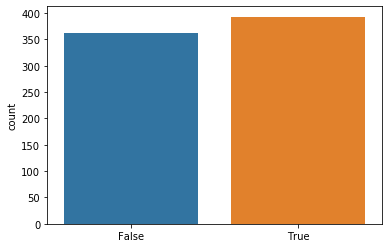

In [13]:
ss = matches['toss_winner'] == matches['winner']
sns.countplot(matches['toss_winner'] == matches['winner'])

In [15]:
temp1.head()

,toss_winner,winner,toss_decision
0,Royal Challengers Bangalore,Sunrisers Hyderabad,field
1,Rising Pune Supergiant,Rising Pune Supergiant,field
2,Kolkata Knight Riders,Kolkata Knight Riders,field
3,Kings XI Punjab,Kings XI Punjab,field
4,Royal Challengers Bangalore,Royal Challengers Bangalore,bat


In [17]:
temp2=matches[['win_by_runs','win_by_wickets']]

In [18]:
temp2.head()

,win_by_runs,win_by_wickets
0,35,0
1,0,7
2,0,10
3,0,6
4,15,0


In [19]:
#most utilized venues
matches['venue'].value_counts().head(10)

Eden Gardens                                  77
Wankhede Stadium                              73
M Chinnaswamy Stadium                         73
Feroz Shah Kotla                              67
Rajiv Gandhi International Stadium, Uppal     56
MA Chidambaram Stadium, Chepauk               49
Sawai Mansingh Stadium                        47
Punjab Cricket Association Stadium, Mohali    35
Maharashtra Cricket Association Stadium       21
Subrata Roy Sahara Stadium                    17
Name: venue, dtype: int64

In [20]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [21]:
runsDF = deliveries.groupby('batsman').sum().sort_values('batsman_runs',ascending=False)
runsDF['batsman_runs']

batsman
V Kohli        5434
SK Raina       5415
RG Sharma      4914
DA Warner      4741
S Dhawan       4632
               ... 
IC Pandey         0
J Denly           0
P Raj             0
Sunny Gupta       0
L Ablish          0
Name: batsman_runs, Length: 516, dtype: int64

In [22]:
#season wise team anaalysis
teams_per_season = matches.groupby('season')['winner'].value_counts()
teams_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [23]:
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']
#team that won by max runs

'Mumbai Indians'